In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
from jwst_plots import JWSTCatalog
from jwst_plots import make_cat_use

In [7]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
#'/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [8]:
fn_405 = f'{basepath}/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
ww = WCS(fits.open(fn_405)[1].header)
data = fits.open(fn_405)[1].data

Set DATE-AVG to '2023-04-20T10:07:44.724' from MJD-AVG.
Set DATE-END to '2023-04-25T05:06:53.406' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.177752 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298809712.873 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
cat_use = make_cat_use()

# Prep Colors

In [28]:
color_187_405 = cat_use.color('F187N', 'F405N')
color_182_212 = cat_use.color('F182M', 'F212N')
color_212_410 = cat_use.color('F212N', 'F410M')
color_410_466 = cat_use.color('F410M', 'F466N')
color_405_410 = cat_use.color('F405N', 'F410M')
color_187_182 = cat_use.color('F187N', 'F182M')
color_182_410 = cat_use.color('F182M', 'F410M')

In [11]:
data_0 = np.zeros_like(data)
data_0[data_0 == 0] = np.nan

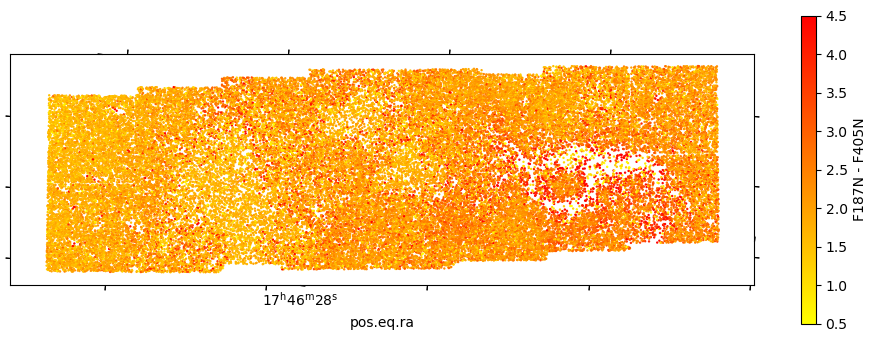

In [12]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_187_405, s=0.5, cmap='autumn_r', transform=ax.get_transform('world'), vmin=0.5, vmax=4.5)
plt.colorbar(im, label='F187N - F405N')
plt.show()

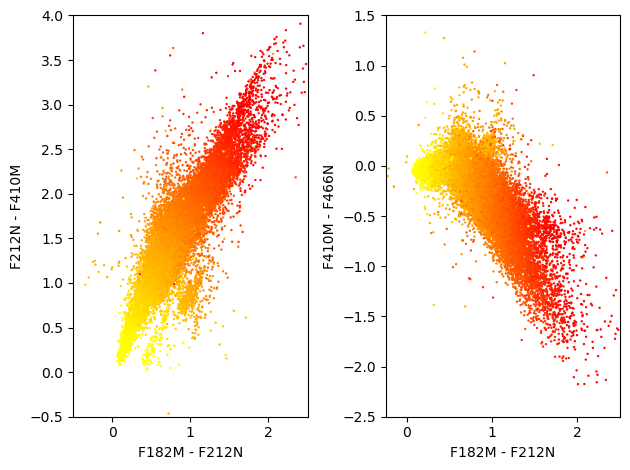

In [13]:
ax1 = plt.subplot(121)
cat_use.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=color_187_405, ax=ax1, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 4)

ax2 = plt.subplot(122)
cat_use.plot_CCD('F182M', 'F212N', 'F410M', 'F466N', c=color_187_405, ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_xlim(-0.25, 2.5)
ax2.set_ylim(-2.5, 1.5)

plt.tight_layout()
plt.show()

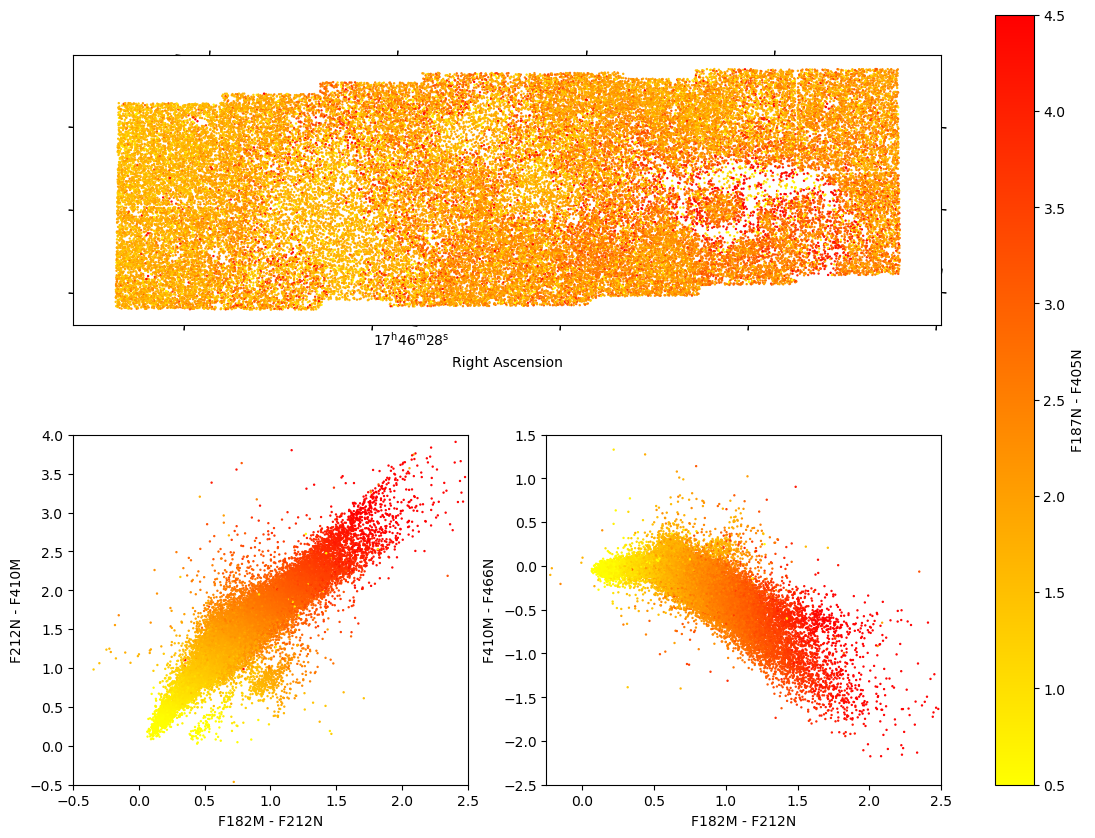

In [14]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(211, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_187_405, s=0.5, cmap='autumn_r', transform=ax.get_transform('world'), vmin=0.5, vmax=4.5)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax1 = fig.add_subplot(223)
cat_use.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=color_187_405, ax=ax1, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 4)

ax2 = fig.add_subplot(224)
cat_use.plot_CCD('F182M', 'F212N', 'F410M', 'F466N', c=color_187_405, ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_xlim(-0.25, 2.5)
ax2.set_ylim(-2.5, 1.5)

plt.colorbar(im, label='F187N - F405N', ax=[ax, ax1, ax2])
#plt.tight_layout()

plt.show()

# More CCDs

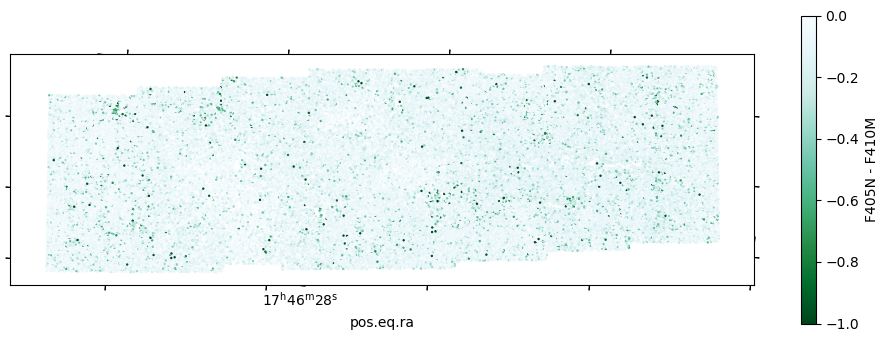

In [21]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_405_410, s=0.5, cmap='BuGn_r', transform=ax.get_transform('world'), vmax=0, vmin=-1)
plt.colorbar(im, label='F405N - F410M')
plt.show()

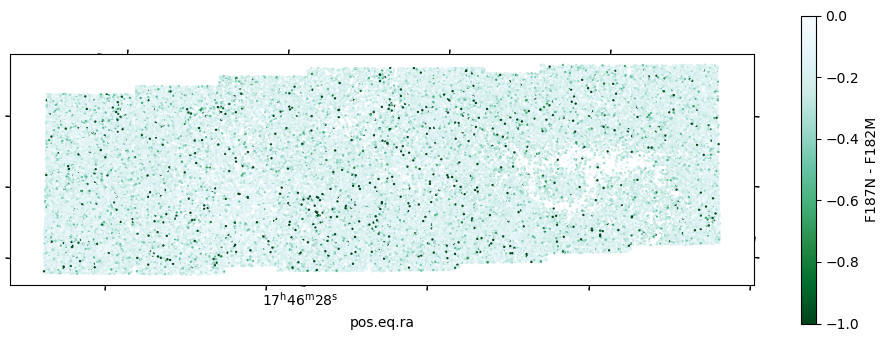

In [22]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(111, projection=ww)
ax.imshow(data_0, cmap='gray', origin='lower')
im = ax.scatter(cat_use.ra, cat_use.dec, c=color_187_182, s=0.5, cmap='BuGn_r', transform=ax.get_transform('world'), vmax=0, vmin=-1)
plt.colorbar(im, label='F187N - F182M')
plt.show()

In [59]:
# Mask for detection in more than one filter
basetable = cat_use.catalog
mask_405_410 = np.logical_and(~np.isnan(basetable['mag_ab_f405n']), ~np.isnan(basetable['mag_ab_f410m']))
mask_no_405_410 = np.logical_and(np.isnan(basetable['mag_ab_f405n']), np.isnan(basetable['mag_ab_f410m']))
mask_405_410 = np.logical_or(mask_405_410, mask_no_405_410)
mask_187_182 = np.logical_and(~np.isnan(basetable['mag_ab_f187n']), ~np.isnan(basetable['mag_ab_f182m']))
mask_no_187_182 = np.logical_and(np.isnan(basetable['mag_ab_f187n']), np.isnan(basetable['mag_ab_f182m']))
mask_187_182 = np.logical_or(mask_187_182, mask_no_187_182)
mask_firm_detection = np.logical_and(mask_405_410, mask_187_182)

(0.0, 7.5)

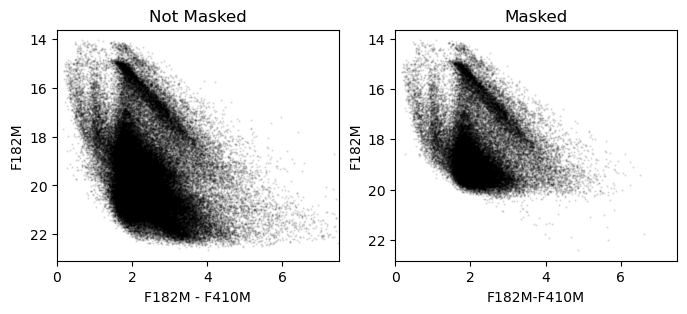

In [60]:
fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(122)

ax.scatter(color_182_410[mask_firm_detection], cat_use.catalog['mag_ab_f182m'][mask_firm_detection], s=0.5, alpha=0.1, color='k')
ax.set_xlabel('F182M-F410M')
ax.set_ylabel('F182M')
ax.set_title('Masked')
plt.gca().invert_yaxis()
ax.set_xlim(0, 7.5)

ax = plt.subplot(121)
ax.set_title('Not Masked')
cat_use.plot_CMD('F182M', 'F410M', 'F182M', s=0.5, alpha=0.1, color='k', ax=ax)
ax.set_xlim(0, 7.5)